In [1]:
from params import states_list, years_list
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
# Will: ER Visits and visualization

total_er_visits = "Resources/total_er_visits.csv"
total_er_visits = pd.read_csv(total_er_visits)
total_er_df = pd.DataFrame(total_er_visits)
total_er_df = total_er_df.set_index('State')

total_er_df

,2010,2011,2012,2013,2014
State,,,,,
Arizona,2305413,2416553,2476208,2432305,2569082
Florida,8173500,8507584,9041333,9194744,9764626
Illinois,4955198,5140486,5305026,5092925,5245177
Iowa,1140898,1171011,1188770,1159998,1194712
Kentucky,2404944,2433143,2430001,2321513,2436880
Maryland,2408759,2498178,2619227,2530131,2527936
Minnesota,1801852,1876179,1789410,1749949,1865994
Nebraska,536858,538245,546455,551549,563255
North Carolina,4125701,5633259,4499568,4585990,4672977


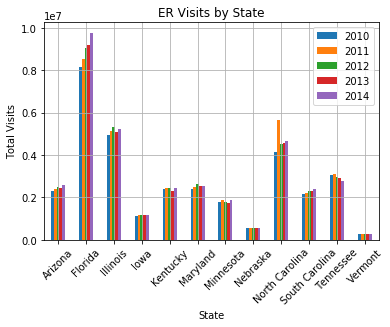

In [3]:
ax = total_er_df.plot.bar(rot=45)
ax.set_title("ER Visits by State")
ax.set_ylabel("Total Visits")
ax.grid()

In [4]:
# Jaime:

#Read in excel file
df = pd.read_excel('Resources/hic04_acs.xls', skiprows = 3, index_col = [0,1])[:-6]
df

2018       Unnamed: 3 Unnamed: 4  \
Nation/State  Coverage                                                  
Nation/State  Coverage           Estimate  Margin of Error    Percent   
UNITED STATES Total                322249               15        100   
              Any coverage         293684              178       91.1   
              Uninsured             28566              183        8.9   
              Private              217623              404       67.5   
...                                   ...              ...        ...   
WYOMING       ..Direct-purchase        89                6       15.7   
              ..TRICARE                23                4        4.1   
              Public                  155                6       27.3   
              ..Medicaid               58                5       10.3   
              ..Medicare              102                3         18   

                                      Unnamed: 5      2017       Unnamed: 7  \
Nation/State  Coverage                                                        
Nation/State  Coverage           Margin of Error  Estimate  Margin of Error   
UNITED STATES Total                            Z    320775               15   
              Any coverage                   0.1    292756              184   
              Uninsured                      0.1     28019              188   
              Private                        0.1    216952              419   
...                                          ...       ...              ...   
WYOMING       ..Direct-purchase              1.1        89                5   
              ..TRICARE                      0.6        20                3   
              Public                           1       161                6   
              ..Medicaid                     0.9        69                6   
              ..Medicare                     0.4        98                2   

                                Unnamed: 8       Unnamed: 9      2016  \
Nation/State  Coverage                                                  
Nation/State  Coverage             Percent  Margin of Error  Estimate   
UNITED STATES Total                    100                Z    318176   
              Any coverage            91.3              0.1    290872   
              Uninsured                8.7              0.1     27304   
              Private                 67.6              0.1    215859   
...                                    ...              ...       ...   
WYOMING       ..Direct-purchase       15.6              0.9        94   
              ..TRICARE                3.6              0.6        19   
              Public                  28.3              1.1       157   
              ..Medicaid              12.2                1        70   
              ..Medicare              17.3              0.4        94   

                                     Unnamed: 11  ... Unnamed: 36  \
Nation/State  Coverage                            ...               
Nation/State  Coverage           Margin of Error  ...     Percent   
UNITED STATES Total                           15  ...         100   
              Any coverage                   158  ...        84.5   
              Uninsured                      162  ...        15.5   
              Private                        369  ...        65.8   
...                                          ...  ...         ...   
WYOMING       ..Direct-purchase                6  ...        13.4   
              ..TRICARE                        3  ...         3.7   
              Public                           5  ...          26   
              ..Medicaid                       5  ...        12.8   
              ..Medicare                       2  ...        13.3   

                                     Unnamed: 37      2009      Unnamed: 39  \
Nation/State  Coverage                                                        
Nation/State  Coverage           Margin of Error  Est

In [5]:
#Drop columns with names not needed for analysis, only estimates are needed
for name, series in df.iteritems():
    if "Unnamed" in str(name):
        df = df.drop(name, axis = 1)

#Drop columns with years not needed for analysis
for name, series in df.iteritems():
    if name not in years_list:
        df = df.drop(name, axis =1)

#Remove states not needed for analysis
for index, row in df.iterrows():
    state, coverage = index
    if state.lower().capitalize() not in states_list:
        df = df.drop(state, level = 'Nation/State')

#Change Nation/State to State
df

Empty DataFrame
Columns: []
Index: [(ARIZONA, Total), (ARIZONA, Any coverage), (ARIZONA, Uninsured), (ARIZONA, Private), (ARIZONA, ..Employer-based), (ARIZONA, ..Direct-purchase), (ARIZONA, ..TRICARE), (ARIZONA, Public), (ARIZONA, ..Medicaid), (ARIZONA, ..Medicare), (ARIZONA, ..VA Care), (FLORIDA, Total), (FLORIDA, Any coverage), (FLORIDA, Uninsured), (FLORIDA, Private), (FLORIDA, ..Employer-based), (FLORIDA, ..Direct-purchase), (FLORIDA, ..TRICARE), (FLORIDA, Public), (FLORIDA, ..Medicaid), (FLORIDA, ..Medicare), (FLORIDA, ..VA Care), (ILLINOIS, Total), (ILLINOIS, Any coverage), (ILLINOIS, Uninsured), (ILLINOIS, Private), (ILLINOIS, ..Employer-based), (ILLINOIS, ..Direct-purchase), (ILLINOIS, ..TRICARE), (ILLINOIS, Public), (ILLINOIS, ..Medicaid), (ILLINOIS, ..Medicare), (ILLINOIS, ..VA Care), (IOWA, Total), (IOWA, Any coverage), (IOWA, Uninsured), (IOWA, Private), (IOWA, ..Employer-based), (IOWA, ..Direct-purchase), (IOWA, ..TRICARE), (IOWA, Public), (IOWA, ..Medicaid), (IOWA, ..Medicare), (IOWA, ..VA Care), (KENTUCKY, Total), (KENTUCKY, Any coverage), (KENTUCKY, Uninsured), (KENTUCKY, Private), (KENTUCKY, ..Employer-based), (KENTUCKY, ..Direct-purchase), (KENTUCKY, ..TRICARE), (KENTUCKY, Public), (KENTUCKY, ..Medicaid), (KENTUCKY, ..Medicare), (KENTUCKY, ..VA Care), (MARYLAND, Total), (MARYLAND, Any coverage), (MARYLAND, Uninsured), (MARYLAND, Private), (MARYLAND, ..Employer-based), (MARYLAND, ..Direct-purchase), (MARYLAND, ..TRICARE), (MARYLAND, Public), (MARYLAND, ..Medicaid), (MARYLAND, ..Medicare), (MARYLAND, ..VA Care), (MINNESOTA, Total), (MINNESOTA, Any coverage), (MINNESOTA, Uninsured), (MINNESOTA, Private), (MINNESOTA, ..Employer-based), (MINNESOTA, ..Direct-purchase), (MINNESOTA, ..TRICARE), (MINNESOTA, Public), (MINNESOTA, ..Medicaid), (MINNESOTA, ..Medicare), (MINNESOTA, ..VA Care), (NEBRASKA, Total), (NEBRASKA, Any coverage), (NEBRASKA, Uninsured), (NEBRASKA, Private), (NEBRASKA, ..Employer-based), (NEBRASKA, ..Direct-purchase), (NEBRASKA, ..TRICARE), (NEBRASKA, Public), (NEBRASKA, ..Medicaid), (NEBRASKA, ..Medicare), (NEBRASKA, ..VA Care), (TENNESSEE, Total), (TENNESSEE, Any coverage), (TENNESSEE, Uninsured), (TENNESSEE, Private), (TENNESSEE, ..Employer-based), (TENNESSEE, ..Direct-purchase), (TENNESSEE, ..TRICARE), (TENNESSEE, Public), (TENNESSEE, ..Medicaid), (TENNESSEE, ..Medicare), (TENNESSEE, ..VA Care), (VERMONT, Total), ...]

[110 rows x 0 columns]

In [6]:
# df.to_csv('Resources/hic04_acs_CLEAN.csv')

In [9]:
# Heather and Jennifer: Mortality visuals (Jennifer) using cleaned up mortality data (Heather)

mortality_df = pd.read_csv('Resources/crudemortality.csv')

mortality_df

,STATE,2010,2011,2012,2013,2014
0,Arizona,731.6,747.4,755.8,761.6,765.6
1,Florida,924.4,910.5,916.0,924.0,934.8
2,Illinois,778.8,792.5,795.7,802.1,817.5
3,Iowa,910.8,919.6,922.9,936.1,939.5
4,Kentucky,967.5,975.4,996.1,994.6,1015.9
5,Maryland,750.4,748.6,754.9,769.3,767.5
6,Minnesota,734.8,744.6,743.7,755.9,759.5
7,Nebraska,830.7,840.1,843.9,842.9,849.2
8,North Carolina,826.1,827.7,840.4,846.1,858.5
9,South Carolina,899.7,900.3,914.7,934.3,940.6


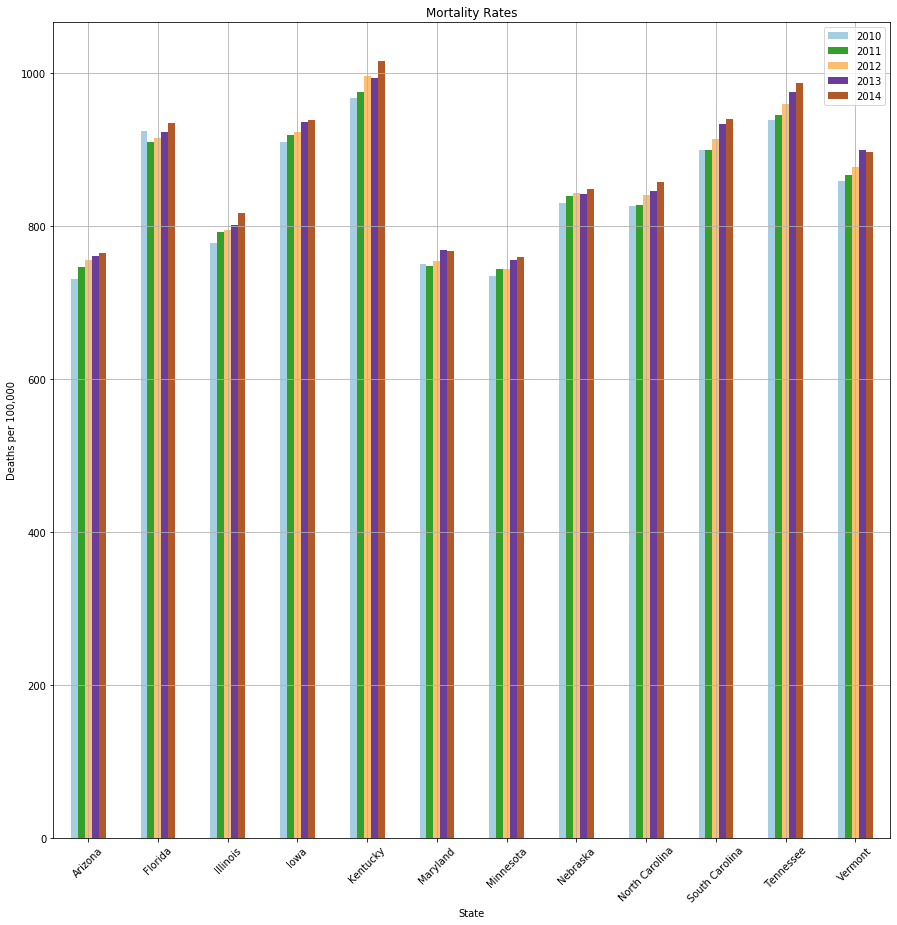

In [13]:
# Using a bar chart to better visualize the mortality rate per 100,000 by state for each year

mortality_df = mortality_df.set_index('STATE')
ax = mortality_df.plot.bar(figsize=(15,15), colormap = 'Paired')
ax.set_title('Mortality Rates')
ax.set_ylabel('Deaths per 100,000')
ax.set_xlabel('State')
plt.xticks(rotation = 45)
plt.legend(loc = 'best')
ax.grid()